In [1]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import numpy as np
import pandas as pd
import math
import warnings
from pandas import ExcelWriter
from pandas import ExcelFile
import sys

In [ ]:
#INPUT FILE RUN
#Cambiar al archivo que se quiere usar
input_file='Inputdata_Lectura.ipynb'

#Obtiene directorio actual
cwd = os.getcwd()
#Busca directorio arriba
here=os.path.dirname(cwd)
#Arma el directorio donde están los inputs
inputs=os.path.join(here,'INPUTS')
#Arma el camino al archivo
inputs=os.path.join(inputs,input_file)

print('\033[91m' + 'Archivo Input:' + '\033[0m' + inputs)

%run $inputs

Cantidad de archivos que encontró: 4
Nombres de los archivos: ['C:\\Ana\\Python\\Test\\fix-IVTNH_1-SD_ManzioneCarmela.csv', 'C:\\Ana\\Python\\Test\\fix-IVTNH_11-SD_F_9_-Lc1AUkLZvHaOftVGA0v_1554814867128.csv', 'C:\\Ana\\Python\\Test\\fix-IVTNH_2-SD_CastellucciJulia.csv', 'C:\\Ana\\Python\\Test\\fix-IVTNH_3-SD_ZacchinoEmilia.csv']
Construyendo Heatmap para Trial: 1
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial1.png
Construyendo Heatmap para Trial: 2
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial2.png
Construyendo Heatmap para Trial: 3
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial3.png
Construyendo Heatmap para Trial: 4
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial4.png
Construyendo Heatmap para Trial: 5
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial5.png
Construyendo Heatmap para Trial: 6
Salvando archivo en: C:\Ana\Python\Test\Heatmap_Trial6.png


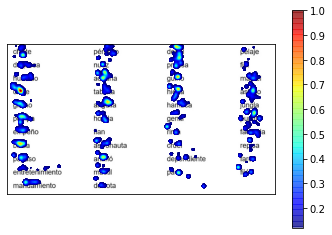

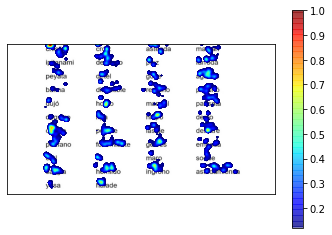

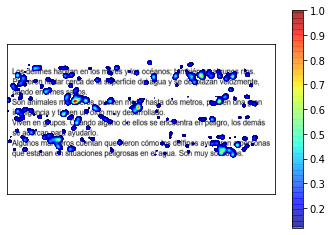

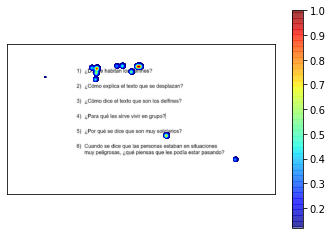

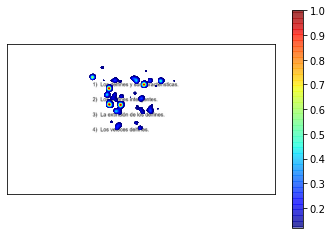

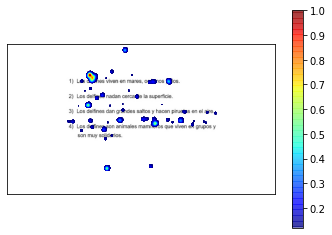

In [11]:
files1=glob.glob(directory_out + 'fix-*.csv')

kmax=len(files1)
print('\033[91m' + 'Cantidad de archivos que encontró:' + '\033[0m',kmax)
print('\033[91m' + 'Nombres de los archivos:' + '\033[0m',files1)

fix1=pd.read_csv(files1[0])
ntot_trials=fix1["trial"].iloc[-1]
del fix1

y, x = np.meshgrid(np.linspace(-resy/2, resy/2, 1000), np.linspace(-resx/2, resx/2, 1000))
gaussSigma = 10

for nt in range(ntot_trials):
    ntrial=nt+1
    
    z=np.zeros((1000,1000))
    print('\033[91m' + 'Construyendo Heatmap para Trial:' + '\033[0m',ntrial)

    k=0
    for file in files1:
        filename_in=file
            
        fix=pd.read_csv(filename_in)
        fix.reset_index(drop=True)
    
        nfix_tot=fix.shape[0]
    
        fix_x=np.array(fix["avg_loc_x"][fix["trial"]==ntrial])
        fix_y=np.array(-fix["avg_loc_y"][fix["trial"]==ntrial])
        fix_xy=np.column_stack((fix_x, fix_y))
        fix_xy[np.isnan(fix_xy)]=0
        nfix=fix_xy.shape[0]
        
        gazeDuration = np.array(fix["duration"][fix["trial"]==ntrial] / np.amax(fix["duration"][fix["trial"]==ntrial])) # rescale to 0-1
        
        for j in range(nfix):
            z = z + gazeDuration[j]*np.exp(-((x - fix_xy[j,0])**2/(2*gaussSigma**2)+(y - fix_xy[j,1])**2/(2*gaussSigma**2)))
        
        k=k+1
        if k==kmax:
            break
    
    z=z/np.amax(z)
    z[z<0.12]=np.nan
    im = plt.imread(directory_trials + "Trial" + str(ntrial) + ".png")
    fig, ax = plt.subplots()
    im = ax.imshow(im, extent=[-resx/2, resx/2, -resy/2, resy/2])
    im1 = ax.pcolormesh(x, y, z, alpha=0.5,edgecolor="none",shading="auto",cmap="jet")
    ax.axis([-resx/2, resx/2,-resy/2, resy/2])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    fig.colorbar(im1)
    print('\033[91m' + "Salvando archivo en:" ,directory_out + "Heatmap_Trial" + str(ntrial) + ".png")
    plt.savefig(directory_out + "Heatmap_Trial" + str(ntrial) + ".png")     
                                